In [ ]:
import tensorflow as tf
from google.colab import drive

In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/Machine Learning


/content/drive/MyDrive/Machine Learning


In [ ]:
from tensorflow import keras
tf.__version__

'2.5.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

Import our data from Keras data cloud.


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_train.shape

(55000, 28, 28)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation= "relu"))
model.add(keras.layers.Dense(100, activation= "relu"))
model.add(keras.layers.Dense(10, activation= "softmax"))

This cell creat new model with 1 input layer, 2 hidden layers using Relu activation function and 1 output layer using Softmax activation function.
You might wonder why input layer has to be flattened into 1D-array. It's because the image we put in has 28 x 28 = 784 pixels, and we have to put every pixel of it into our Neural Network, so there are 784 inputs in the input layer, each represents one pixel of the image respectively.
In the first hidden layer, we creat 300 perceptrons, each uses the Relu activation function. The second one is also the same, except for its number of perceptrons, which is only 100. Note that they also manage their own matrices of weight containing all the connection weitghts between the neurons and their input.
The last layer has 10 perceptrons, each represents one class of our data. This  layer using softmax activation function because the classes are exclusive.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Here we have a summary of our Neural Network, "None" means their values are various. You can see how former layers affect its latter one, i.e the first dense layer has the Parameters of 235 500 units, it means we have 784 x 300 connection weights, plus 300 bias terms.

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

After creating model, we have to use compile() method to specify the loss function and the optimizer we are going to use.
>//"sparse_categorical_crossentropy":: Our classes are unique, and this is multiclass problem, we have to return 1x1 vector that is the index indices of the class_names.
//"sgd":: using Stochastic Gradient Descent as optimizer. This means Keras will use the BackPropagation algorithm to define every value of weights and biases throughout the training process.

In [ ]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7292 - accuracy: 0.7618 - val_loss: 0.5144 - val_accuracy: 0.8304
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4940 - accuracy: 0.8294 - val_loss: 0.4461 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4492 - accuracy: 0.8443 - val_loss: 0.4140 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4205 - accuracy: 0.8523 - val_loss: 0.3959 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3999 - accuracy: 0.8597 - val_loss: 0.3803 - val_accuracy: 0.8706
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3835 - accuracy: 0.8661 - val_loss: 0.3757 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3697 - accuracy: 0.8696 - val_loss: 0.3615 - val_accuracy:

We pass it the input features(X_train) and the target classes(y_train), the number of epochs to train (default value is 1), the validation set (X_valid, y_valid).
Note that if the performance on the training set is much better than on the validation test, our model tend to overfit the training set.

We can plot the loss and accuracy curves by using these code below

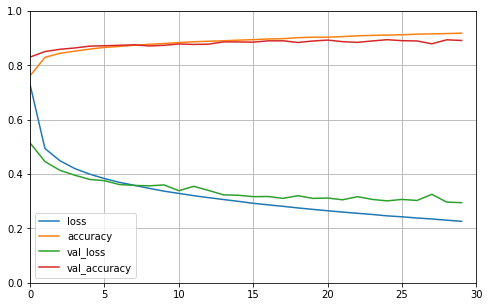

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.gca().set_xlim(0, 30)
plt.show()

Look at the validation curves and training curves, they are close to each other, which means that there is not too much overfitting, and that is great.

Now that we have created our model, we can use it to predict new instances. Using the instances in our test set above.

In [ ]:
X_predict = X_test[:5]
y_probability = model.predict(X_predict)
y_probability.round(4)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np
y_predict = model.predict_classes(X_predict)
np.array(class_names)[y_predict]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [ ]:
y_predict

array([9, 2, 1, 1, 6])

In [ ]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)